# Network Analysis with IGraph

### What can be represented with networks?

* Anything with nodes and edges
* Interactions on social networking applications (Facebook, Twitter, Instagram, etc.)
* Biology and ecology (ecosystems)
* Transportation: roads, railroad tracks, available flights
* Finance: stock markets, donors for campaigns, etc.
* The internet, as links and webpages


### Basic Terminology
* __Node/Vertex__: one of two basic building blocks of network graphs. They usually represent individual entities, such as people, accounts, specific locations, etc. For example, in social media network analysis, a vertex could be one individual account.
* __Edge__: second building block of network graphs. Represent connections among vertices. Can be weighted, directed, either, or neither. For example, in a network graph for a specific airline, an edge from one airport to another could represent a flight that follows that path.
* __Subgraph__: any subset of a larger graph. So, any specific group of nodes and edges that belong to a larger network. 
* __Degree__: the number of ties a node has to the rest of the community, so the number of edges extending to/from a single vertex. This property is specific to each vertex. For example, if you were looking at a network graph of Facebook that shows friendship connections, the degree of each vertex (assuming each vertex was one account) would be the number of friends that individual vertex had.
* __Walk__: a succession of edges going from vertex a to vertex b, where a can equal b (called a “closed” walk).
* __Path__: a walk where every node and edge is different (no repeating or retracing steps). When you hear path, people are usually referring to the critical path, or the shortest path available. For example, if you were looking at a graph of trains and trainstations, a path could represent all the trains you'd have to take to get from Cincinnati, Ohio to Los Angeles, California. If you’re looking at a path where a=b, it is called a cycle - this could represent a round-trip airline ticket set.
* __Shortest Path__: when discussing paths in network analysis, we're mostly concerned with the _shortest_ path. That is, the path from one node to another that crosses the least number of edges (or, in a weighted graph, the path with the lowest weight). Counter-intuitive to the name, there can be many shortest paths for the same pair of vertices: if two paths have the same number of edges (or weights), they are _both_ considered shortest paths for that pair of vertices.

### What information can we study from networks?

* __Size__: number of edges in a graph. This is a good measure of how many connections exist within a certain graph.
* __Order__: number of vertices in a graph. This tells us how many individual nodes/people/accounts/etc we're studying in a given graph.
* __Diameter__: the longest of the shortest path lengths between pairs of vertices. So, if we were looking at a network graph of airports (with edges representing flights), the diameter would be the longest of the lengths of the flighs between any two airports. 

In [2]:
import igraph as ig
from igraph import *
import random
import matplotlib.pyplot as plt

In [3]:
g1 = Graph(directed=True)
g1.add_vertices(["Allie","Emma","Ellen","Alexis","Isabelle"])
#Notice that the nodes are zero-indexed
g1.add_edges([(0,1),(0,3),(1,2),(3,4)])
summary(g1) # -- <#nodes> <#edges> --
g1.diameter()

IGRAPH DN-- 5 4 -- 
+ attr: name (v)


2

---
Directed/Undirected and Weighted/Unweighted
---
__Directed__
* Connecting A to B does not mean the same as connecting B to A
* Example: Twitter follow connections. If I follow someone, it does not mean that they also follow me. So, when creating a network graph for who-follows-whom on Twitter, we would want a directed network graph

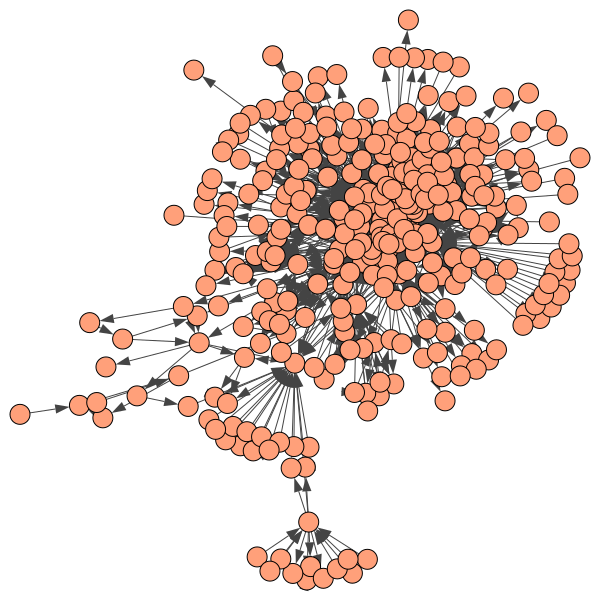

In [34]:
random.seed(28)
us_air=Graph.Read_Ncol("inf-USAir97/inf-USAir97.mtx") #note - delete beginning of file & cite here
us_air.vs["color"] = "Light Salmon"
plot(us_air)

__Undirected__
* The opposite: connecting from A to B is the same as connecting from B to A.
* Example: Friendships on facebook. If someone is friends with me, I am also friends with them, and those friendships have the same meaning. So, when creating a network graph for who’s-friends-with-whom on Facebook, we would choose an undirected network graph

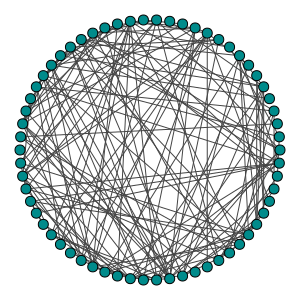

In [13]:
dolphins = read('dolphins/dolphins.gml')
#W. W. Zachary, An information flow model for conflict and fission in small groups, 
#Journal of Anthropological Research 33, 452-473 (1977)
layout = dolphins.layout_circle()
dolphins.vs["color"] = "Dark Cyan"
plot(dolphins, layout=layout, vertex_size=10, vertex_label=None, bbox=(300,300))

__Weighted__
* In weighted graphs, there is a unit of measurement associated with each edge. The idea is usually that the stronger a connection, the greater its weight.
* Example: airline flights, where the unit of measurements is the duration of the flight in hours. Thus, longer flights have higher weights. If we were examining flight time, a weighted network graph could be a nice way to display flights from one location to another

In [3]:
#weighted graph
astro = Graph.Read("astro-ph/astro-ph.gml") #M. E. J. Newman, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001)
astro.vs["label"] = None
astro.vs["size"] = .25
layout = astro.layout_drl()
plot(astro, "testPlot.pdf", layout=layout)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


__Unweighted__
* There is no measurement associated with edges; they simply represent a connection (or lack thereof).
* Example: modeling friendships, roads

In [64]:
g = Graph.Read_Edgelist("Friendship-network_data_2013.csv")
summary(g)

IGRAPH D--- 1829 668 -- 


In [13]:
#plot(g) # nvr ran

# Centrality
### Centrality measures aim to answer the question of “how important or central is one node to the entire network?”
This is an essential element of network analysis. When studying social networks, we often try to figure out who (or what account) is most important to some subgraph of the network, or even the network overall. This can provide significant insights as to who has social influence and how one person/account's actions can impact and guide entire social circles. In transportation analysis, centrality measures can be used to identify what should be the busiest stations/locations, and thus can aid in designing facilities that reflect customers' needs.

### Ways of Measuring Centrality
#### Degree Centrality
Probably the simplest of all centrality measures, degree centrality assigns centrality measures to vertices based on their degree. Recall from earlier that degree is the number of edges (outgoing edges in directed graphs) from a vertex. Thus, degree centrality will assign the highest measure of centrality to the node with the most edges. In an network showing Facebook friendships, for instance, the person with the most friends would be the vertex with the highest level of degree centrality.

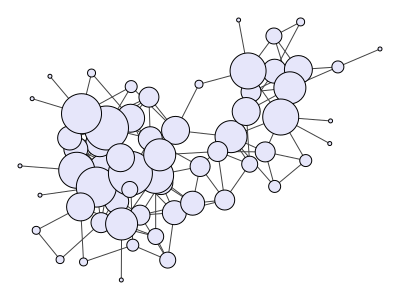

In [24]:
dolphins.degree()
dolphins.vs["size"] = [v*4 for v in dolphins.degree()]
random.seed(35)
plot(dolphins, bbox=(400,300), vertex_color="Lavender", vertex_label=None)

#### Closeness Centrality
The formal definition of closeness centrality is "the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.” In this case, the vertex with the _lowest_ closeness centrality is the most central vertex. When considering a network showing different train stations and railroad lines connecting them, a node with a high closeness centrality would be a station that provides relatively quick access to all other stations.

Note that taking distances to/from is the same for undirected graphs, but can produce very different results for directed graphs. We will only be looking at undirected graphs.

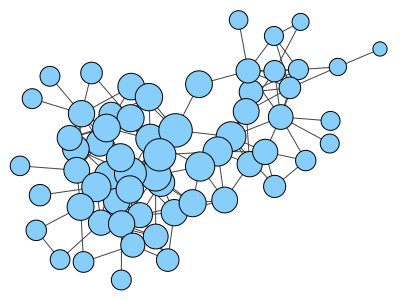

In [25]:
dolphins.vs["size"]=[v*80 for v in dolphins.closeness()]
random.seed(35)
plot(dolphins, bbox=(400,300), vertex_color="Light Sky Blue", vertex_label=None)

#### Betweenness Centrality
Perhaps the more computationally complex of the centrality measures listed here, betweenness centrality looks at every pair of vertices, computes the ratio of shortest paths passing through the vertex in question to all shortest paths, and sums these ratios. The algorithm looks like this:

\begin{equation*}
g(v) = \sum_{s\neq v \neq t} \frac{\sigma_{st} (v)}{\sigma_{st}}
\end{equation*}

    1) For each pair of vertices (s, t), compute the shortest paths between them. 
    2) For each pair of vertices (s, t), determine the fraction of shortest paths that pass through the vertex in question (here, vertex v). 
    3) Sum this fraction over all pairs of vertices (s, t)
 

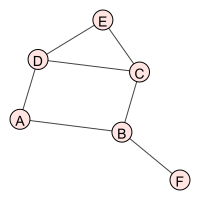

In [19]:
random.seed(30)
exp = Graph([(0,1),(1,2),(2,3),(3,0),(3,4),(2,4),(1,5)])
exp.vs["label"] = ["A","B","C","D","E","F"]
plot(exp, bbox=(200,200), vertex_color="Misty Rose")

Let's walk thorugh calculating the betweenness centrality measure for C.

In [33]:
exp.betweenness()

[1.0, 4.5, 3.0, 1.5, 0.0, 0.0]

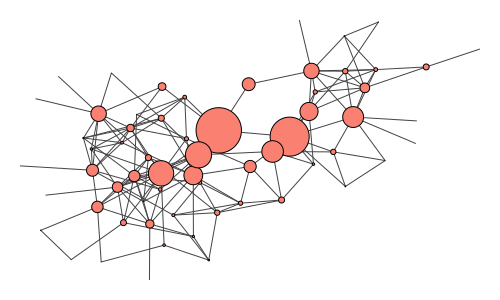

In [17]:
#colors = RainbowPalette(n=int(max(dolphins.betweenness())))
dolphins.vs["size"] = [v/10 for v in dolphins.betweenness()]
random.seed(35)
plot(dolphins, bbox=(500,300),  vertex_color="Salmon", vertex_label=None)

In [18]:
dolphins.vs[dolphins.betweenness().index(max(dolphins.betweenness()))]

igraph.Vertex(<igraph.Graph object at 0x000002387EFDF318>, 36, {'size': 45.42740687329566, 'label': 'SN100', 'color': 'Dark Cyan', 'id': 36.0})

# PageRank

Think of the internet as one massive directed graph, where each page is a vertex, and a link from one page to another is an edge. Pagerank is the probability of a user ending up on a certain page.


\begin{equation*}
\frac{1-d}{N} + d*\sum_{i=1} \frac{PR(I_i)}{C(I_i)}
\end{equation*}

Where d is a damping factor (usually 0.85), N is the number of vertices in the network, C(Ii) represents the number of outgoing edges (links) from vertex Ii, and PR(Ii) represents the pagerank of vertex  Ii

Computed iteratively: initialize every vertex’s pagerank to 1/N

#### Example
Let's go back to the sample graph we used to calculate betweenness centrality. 

In [23]:
exp.pagerank()

[0.14478497471285479,
 0.21836230785869368,
 0.2046697804579824,
 0.2044081911278526,
 0.14090542528265323,
 0.08686932055996321]

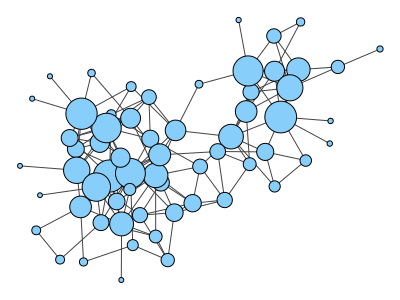

In [30]:
dolphins.vs["size"]=[v*1000 for v in dolphins.pagerank()]
random.seed(35)
plot(dolphins, bbox=(400,300), vertex_color="Light Sky Blue", vertex_label=None)

# Shortest Path Calculations
There are a number of methods of calculating the shortest path between two (or more) vertices. In computer science, this is often referred to as the "traveling salesman problem" and is considered np-hard. Since these calculations are so long and so computationally complex, the iGraph package has built-in optimal methods for finding the shortest path. The (arguably) most popular of these methods is Dijkstra's algorithm. See the appendix for more information and the mathematical formulas.

In [ ]:
us_air.shortest_paths_dijkstra(source=1, target=3)

# Community Detection

Community detection is exactly what it sounds like: finding clusters of nodes that are densly connected to one another, or at least more densly connected to one another than to the rest of the graph. This is especially common in social network analysis, as it can indicate where friend groups lie, what brings them together, and how they differ from the rest of the graph. It often produces surprising results by highlighting communities and clusters that likely wouldn't be apparent without data-based network analysis.

In [ ]:
# calculate dendrogram
dendrogram = astro.community_edge_betweenness()
# convert it into a flat clustering
clusters = astro.as_clustering()
# get the membership vector
membership = clusters.membership